In [1]:
import numpy as np
import os
import random
import scipy
from scipy import signal
from numpy.fft import fft
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.initializers import he_normal

from sklearn.model_selection import train_test_split

import pandas as pd
import pickle

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%%time
train_Bag = np.load("train_Bag.npy")
train_Hips = np.load("train_Hips.npy")
train_Torso = np.load("train_Torso.npy")
train_Hand = np.load("train_Hand.npy")

Wall time: 4h 27min 15s


In [3]:
columns = ['Label', 'Acc_x', 'Acc_y', 'Acc_z', 'Glo_Acc_x', 'Glo_Acc_y',
       'Glo_Acc_z', 'Gra_x', 'Gra_y', 'Gra_z', 'Gyr_x', 'Gyr_y', 'Gyr_z',
       'LAcc_x', 'LAcc_y', 'LAcc_z', 'Mag_x', 'Mag_y', 'Mag_z', 'Ori_w',
       'Ori_x', 'Ori_y', 'Ori_z', 'Pressure']
columns = dict(zip(columns, [tmp for tmp in range(len(columns))]))
columns

{'Label': 0,
 'Acc_x': 1,
 'Acc_y': 2,
 'Acc_z': 3,
 'Glo_Acc_x': 4,
 'Glo_Acc_y': 5,
 'Glo_Acc_z': 6,
 'Gra_x': 7,
 'Gra_y': 8,
 'Gra_z': 9,
 'Gyr_x': 10,
 'Gyr_y': 11,
 'Gyr_z': 12,
 'LAcc_x': 13,
 'LAcc_y': 14,
 'LAcc_z': 15,
 'Mag_x': 16,
 'Mag_y': 17,
 'Mag_z': 18,
 'Ori_w': 19,
 'Ori_x': 20,
 'Ori_y': 21,
 'Ori_z': 22,
 'Pressure': 23}

In [4]:
def Acc_plot(index, start_index, count=10):
#     count = 300
    tt = np.linspace(0, 100, count * 500)
    plt.figure(figsize=(24, 4))
    bag = train_Bag[start_index].copy()
    hips = train_Hips[start_index].copy()
    torso = train_Torso[start_index].copy()
    hand = train_Hand[start_index].copy()

    for i in range(start_index+1, start_index + count):
        bag = np.vstack((bag, train_Bag[i].copy()))
        hips = np.vstack((hips, train_Hips[i].copy()))
        torso = np.vstack((torso, train_Torso[i].copy()))
        hand = np.vstack((hand, train_Hand[i].copy()))
    print(bag.shape)
    
    bag[:, index] = np.abs(np.fft.fft(bag[:, index]))
    hips[:, index] = np.abs(np.fft.fft(hips[:, index]))
    torso[:, index] = np.abs(np.fft.fft(torso[:, index]))
    hand[:, index] = np.abs(np.fft.fft(hand[:, index]))
    
    plt.plot(tt, bag[:, index], color='blue')
    plt.plot(tt, hips[:, index], color='red')
    plt.plot(tt, torso[:, index], color='green')
    plt.plot(tt, torso[:, index], color='yellow')
    plt.xlabel("Frequency[Hz]", fontsize=18)
    plt.ylabel("Amplitude", fontsize=18)
    plt.xlim(0.1, 50)
#     plt.ylim(0, 30 ** 8)
    plt.show()
    print(bag[0, 0])

(500, 24)


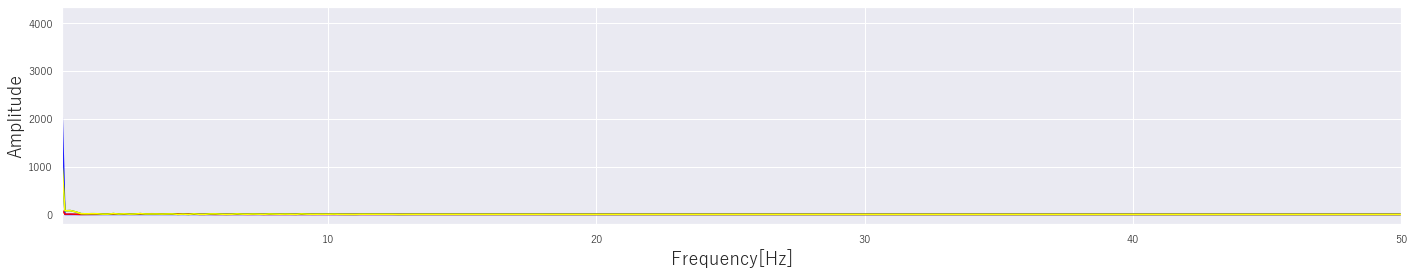

1.0


In [5]:
Acc_plot(1, 18000, 1)

In [6]:
train_Bag.shape

(195491, 500, 24)

In [19]:
%%time
train_Bag_glo_accel_xy = np.sqrt(np.square(train_Bag[:, :, 4].copy()) + np.square(train_Bag[:, :, 5].copy()))
np.save("train_Bag_glo_accel_xy", train_Bag_glo_accel_xy)

Wall time: 8min 33s


In [20]:
train_Bag_glo_accel_xy.shape

(195491, 500)

In [26]:
%%time

np.save("train_Bag_glo_z_mean", np.mean(train_Bag[:, :, 6].copy(), axis=1))

from mutagen.mp3 import MP3 as mp3
import pygame
import time



Wall time: 3min 20s


In [23]:
 np.mean(train_Bag_glo_accel_xy.copy(), axis=1).shape

(195491,)

In [32]:
np.save("train_Bag_pressure_change", train_Bag[:, -1, -1] - train_Bag[:, 0, -1])

filename = '../mac_poteto.mp3' #再生したいmp3ファイル
pygame.mixer.init()
pygame.mixer.music.load(filename) #音源を読み込み
mp3_length = mp3(filename).info.length #音源の長さ取得
pygame.mixer.music.play(1) #再生開始。1の部分を変えるとn回再生(その場合は次の行の秒数も×nすること)
time.sleep(mp3_length + 0.25) #再生開始後、音源の長さだけ待つ(0.25待つのは誤差解消)
pygame.mixer.music.stop() #音源の長さ待ったら再生停止

In [33]:
def save_npy(x, hold_position):
    x_glo_accel_xy = np.sqrt(np.square(x[:, :, 4]) + np.square(x[:, :, 5]))
    np.save("train_" + hold_position + "_glo_accel_xy", x_glo_accel_xy)
    np.save("train_" + hold_position + "_glo_accel_xy_mean", np.mean(x_glo_accel_xy.copy(), axis=1))
    np.save("train_" + hold_position + "_glo_accel_xy_var", np.var(x_glo_accel_xy.copy(), axis=1))
    np.save("train_" + hold_position + "_glo_accel_z_mean", np.mean(x[:, :, 6].copy(), axis=1))
    np.save("train_" + hold_position + "_glo_accel_z_var", np.var(x[:, :, 6].copy(), axis=1))
    np.save("train_" + hold_position + "_pressure_change", x[:, -1, -1] - x[:, 0, -1])

In [34]:
%%time
save_npy(train_Hips.copy(), "Hips")
save_npy(train_Torso.copy(), "Torso")
save_npy(train_Hand.copy(), "Hand")

filename = '../mac_poteto.mp3' #再生したいmp3ファイル
pygame.mixer.init()
pygame.mixer.music.load(filename) #音源を読み込み
mp3_length = mp3(filename).info.length #音源の長さ取得
pygame.mixer.music.play(1) #再生開始。1の部分を変えるとn回再生(その場合は次の行の秒数も×nすること)
time.sleep(mp3_length + 0.25) #再生開始後、音源の長さだけ待つ(0.25待つのは誤差解消)
pygame.mixer.music.stop() #音源の長さ待ったら再生停止

Wall time: 3h 2min 58s


In [35]:
def save_columns(x, start_index, end_index, file_name):
    np.save(file_name, x[:, :, start_index:end_index])

In [36]:
%%time
save_columns(train_Bag, 0, 1, "train_Bag/train_Bag_Label")
save_columns(train_Bag, 1, 4, "train_Bag/train_Bag_Acc")
save_columns(train_Bag, 4, 7, "train_Bag/train_Bag_Glo_Acc")
save_columns(train_Bag, 7, 10, "train_Bag/train_Bag_Gra")
save_columns(train_Bag, 10, 13, "train_Bag/train_Bag_Gyr")
save_columns(train_Bag, 13, 16, "train_Bag/train_Bag_LAcc")
save_columns(train_Bag, 16, 19, "train_Bag/train_Bag_Mag")
save_columns(train_Bag, 19, 23, "train_Bag/train_Bag_Ori")
save_columns(train_Bag, 23, 24, "train_Bag/train_Bag_Pressure")

Wall time: 54min 9s


In [37]:
%%time
save_columns(train_Hips, 0, 1, "train_Hips/train_Hips_Label")
save_columns(train_Hips, 1, 4, "train_Hips/train_Hips_Acc")
save_columns(train_Hips, 4, 7, "train_Hips/train_Hips_Glo_Acc")
save_columns(train_Hips, 7, 10, "train_Hips/train_Hips_Gra")
save_columns(train_Hips, 10, 13, "train_Hips/train_Hips_Gyr")
save_columns(train_Hips, 13, 16, "train_Hips/train_Hips_LAcc")
save_columns(train_Hips, 16, 19, "train_Hips/train_Hips_Mag")
save_columns(train_Hips, 19, 23, "train_Hips/train_Hips_Ori")
save_columns(train_Hips, 23, 24, "train_Hips/train_Hips_Pressure")

Wall time: 24min 2s


In [38]:
%%time
save_columns(train_Torso, 0, 1, "train_Torso/train_Torso_Label")
save_columns(train_Torso, 1, 4, "train_Torso/train_Torso_Acc")
save_columns(train_Torso, 4, 7, "train_Torso/train_Torso_Glo_Acc")
save_columns(train_Torso, 7, 10, "train_Torso/train_Torso_Gra")
save_columns(train_Torso, 10, 13, "train_Torso/train_Torso_Gyr")
save_columns(train_Torso, 13, 16, "train_Torso/train_Torso_LAcc")
save_columns(train_Torso, 16, 19, "train_Torso/train_Torso_Mag")
save_columns(train_Torso, 19, 23, "train_Torso/train_Torso_Ori")
save_columns(train_Torso, 23, 24, "train_Torso/train_Torso_Pressure")

Wall time: 19min 6s


In [39]:
%%time
save_columns(train_Hand, 0, 1, "train_Hand/train_Hand_Label")
save_columns(train_Hand, 1, 4, "train_Hand/train_Hand_Acc")
save_columns(train_Hand, 4, 7, "train_Hand/train_Hand_Glo_Acc")
save_columns(train_Hand, 7, 10, "train_Hand/train_Hand_Gra")
save_columns(train_Hand, 10, 13, "train_Hand/train_Hand_Gyr")
save_columns(train_Hand, 13, 16, "train_Hand/train_Hand_LAcc")
save_columns(train_Hand, 16, 19, "train_Hand/train_Hand_Mag")
save_columns(train_Hand, 19, 23, "train_Hand/train_Hand_Ori")
save_columns(train_Hand, 23, 24, "train_Hand/train_Hand_Pressure")

Wall time: 23min 28s
